# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Status
Exercise 1 is done.

In [1]:
%%bash
# 1. Open the file './data/befkbhalderstatkode.csv'
head ../data/befkbhalderstatkode.csv

AAR,BYDEL,ALDER,STATKODE,PERSONER
2015,1,0,5100,614
2015,1,0,5104,2
2015,1,0,5106,1
2015,1,0,5110,1
2015,1,0,5120,4
2015,1,0,5126,1
2015,1,0,5130,5
2015,1,0,5140,3
2015,1,0,5150,5


In [2]:
import numpy as np
# 2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
# read data from csv file into 2d numby array
filename = '../data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

print(type(bef_stats_df), ' of size: ',bef_stats_df.size)
dd = bef_stats_df
print(dd)

<class 'numpy.ndarray'>  of size:  2712585
[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [3]:
# 3. Using this data:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

In [4]:
def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

In [5]:
# 3. Find out how many people lived in each of the 11 areas in 2015
mask = (dd[:,0] == 2015)
p_in_2015 = np.array([number_of_people_per_neighbourhood(n, mask) for n in neighb.keys()])
print(p_in_2015)

[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


Sorted: [3872, 39537, 43908, 51727, 51937, 53604, 55205, 61623, 64967, 75113, 78802]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

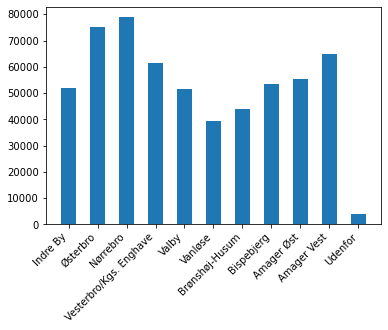

In [6]:
import matplotlib.pyplot as plt
# 4. Make a bar plot to show the size of each city area from the smallest to the largest
people_sorted = sorted(np.copy(p_in_2015))
print('Sorted:',people_sorted)
plt.bar(neighb.values(), p_in_2015,width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [7]:
temp = dict(zip(neighb.values(), p_in_2015))
print(temp)

{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


In [8]:
result = temp.items()
temp_list = list(result)
temp_array = np.array(temp_list)
print(temp_array)

[['Indre By' '51937']
 ['Østerbro' '75113']
 ['Nørrebro' '78802']
 ['Vesterbro/Kgs. Enghave' '61623']
 ['Valby' '51727']
 ['Vanløse' '39537']
 ['Brønshøj-Husum' '43908']
 ['Bispebjerg' '53604']
 ['Amager Øst' '55205']
 ['Amager Vest' '64967']
 ['Udenfor' '3872']]


[['Udenfor' '3872']
 ['Vanløse' '39537']
 ['Brønshøj-Husum' '43908']
 ['Valby' '51727']
 ['Indre By' '51937']
 ['Bispebjerg' '53604']
 ['Amager Øst' '55205']
 ['Vesterbro/Kgs. Enghave' '61623']
 ['Amager Vest' '64967']
 ['Østerbro' '75113']
 ['Nørrebro' '78802']]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

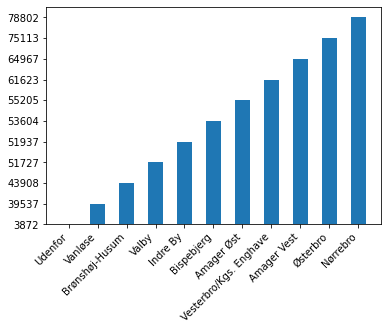

In [9]:
sortedArr = temp_array[temp_array[:,1].argsort()]
print(sortedArr)
plt.bar(sortedArr[:,0], sortedArr[:,1],width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [10]:
# 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
age_mask = (dd[:,2] > 65) & (dd[:,0] == 2015)
per_neighborhood = np.array([number_of_people_per_neighbourhood(n, age_mask) for n in neighb.keys()])
print('Folk over 65 i København i 2015:',per_neighborhood.sum())

Folk over 65 i København i 2015: 55750


In [11]:
# 6. How many of those were from the other nordic countries (not dk)
nordic_countries = {5104: 'Finland', 5106: 'Island', 5110: 'Norge', 5120: 'Sverige'}
def other_nordic_countries(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,3] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

In [12]:
mask = (dd[:,0] == 2015)
other_over_65 = np.array([other_nordic_countries(n, age_mask) for n in nordic_countries.keys()])
print(other_over_65.sum(), 'were from the other nordic countries (not dk)')

608 were from the other nordic countries (not dk)


Vesterbro: {1992: 47854, 1993: 47589, 1994: 47538, 1995: 47633, 1996: 47734, 1997: 48275, 1998: 49109, 1999: 49520, 2000: 50312, 2001: 50756, 2002: 51039, 2003: 51045, 2004: 50869, 2005: 50643, 2006: 50303, 2007: 50964, 2008: 51466, 2009: 53351, 2010: 55315, 2011: 57150, 2012: 58411, 2013: 59211, 2014: 60328, 2015: 61623} 

Østerbro {1992: 62221, 1993: 62583, 1994: 63050, 1995: 63572, 1996: 64503, 1997: 65856, 1998: 66148, 1999: 66295, 2000: 66673, 2001: 66877, 2002: 67020, 2003: 67550, 2004: 67516, 2005: 67671, 2006: 67351, 2007: 67330, 2008: 67964, 2009: 68769, 2010: 69951, 2011: 70938, 2012: 72400, 2013: 73388, 2014: 74521, 2015: 75113}


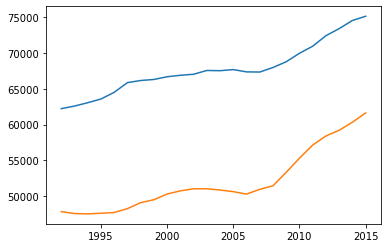

In [13]:
# 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
vesterbro = {}
østerbro = {}
years = list(np.unique(dd[:,0]))
for year in years:
    mask = (dd[:,0] == year) & (dd[:,1] == 4)
    sum = np.sum(dd[mask][:,4])
    vesterbro.update({year: sum})
print('Vesterbro:',vesterbro, '\n')
for year in years:
    mask = (dd[:,0] == year) & (dd[:,1] == 2)
    sum = np.sum(dd[mask][:,4])
    østerbro.update({year: sum})
print('Østerbro',østerbro)
østerbro_values = list(østerbro.values())
vesterbro_values = list(vesterbro.values())

plt.plot(years, østerbro_values)
plt.plot(years, vesterbro_values)